### **사진 다운**

In [1]:
#사진 다운로드
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=1,resize=0.7,color=False)

In [2]:
#출력 라이브러리
import cv2
from google.colab.patches import cv2_imshow

In [3]:
#numpy 라이브러리
import numpy as np

In [4]:
#대형 출력 라이브러리
import matplotlib.pyplot as plt

In [5]:
#시간 라이브러리
import time

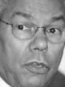

In [6]:
#출력 확인
cv2_imshow(people.images[1400])

### **데이터 전처리**

In [7]:
#사진 기본 사이즈 확인
people.images[0].shape

(87, 65)

In [8]:
#32,32로 리사이즈
resized=np.zeros((1400,32,32))
for i in range(1400):
  resized[i] = cv2.resize(people.images[i],(32,32))
resized[0].shape

(32, 32)

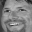

In [9]:
#리사이즈 사진 출력 확인
cv2_imshow(resized[7])

In [10]:
#리사이즈 사진 사이즈 확인
resized[7].shape

(32, 32)

In [11]:
#flat화시키기
flat=np.zeros((1400,1024))
for i in range(1400):
  flat[i]=resized[i].flatten()

In [12]:
#flat 사이즈 확인
flat[7].shape

(1024,)

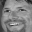

In [13]:
#flat화된 사진 복원 확인
tmpimg=flat[7].reshape(32,32)
cv2_imshow(tmpimg)

### **평균 얼굴 만들기**

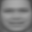

0.006147623062133789


In [14]:
#평균얼굴 구하기
#평균함수로(+시간)
start=time.time()
avg=np.mean(flat,axis=0)
avgimg=avg.reshape(32,32)
cv2_imshow(avgimg)
print(time.time()-start)

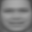

0.0039577484130859375


In [15]:
#평균얼굴 구하기
#더해서나누기(+시간)
start=time.time()
sum=np.sum(resized,axis=0)
avgimg=sum/1400
cv2_imshow(avgimg)
print(time.time()-start)

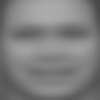

In [16]:
cv2_imshow(cv2.resize(avgimg,(100,100)))

In [17]:
#400개의 사진에서 평균 빼기
flat_avg=np.zeros((400,1024))
resized_avg=np.zeros((400,32,32))
for i in range(400):
  flat_avg[i]=flat[i]-avg
for i in range(400):
  resized_avg[i]=flat_avg[i].reshape(32,32)

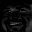

In [18]:
#평균얼굴뺀거 출력 확인
cv2_imshow(resized_avg[7])

In [19]:
image=resized_avg
 
plt.figure(figsize=(30,30))
for i in range(400):
  plt.subplot(20,20,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image[i],cmap='gray')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### **SVD**

In [20]:
U,s,Vt=np.linalg.svd(flat)
#Vt가 At*A의 eigen vector들의 집합

In [21]:
#eigen value를 찾아내고 인덱싱 넣기
Value=[]
for i in range(len(s)):
  Value.append(s[i])

In [22]:
Value.sort(reverse=True)
print(Value)

[157281.36874811756, 16850.090082954954, 14715.087088336157, 13500.09859164022, 8868.457178512966, 8785.449107982748, 7922.620099923929, 7208.104395032414, 6650.975491530429, 6517.83160682757, 6485.932203914656, 6071.249876196791, 5600.68195128781, 5557.980795770465, 5263.375004361931, 4833.984180712807, 4788.66185463304, 4526.593118987841, 4400.76954395772, 4269.283771301154, 4187.413528433813, 4027.362968376051, 3894.7005306928977, 3812.8595699796174, 3787.710054984741, 3653.4477267769794, 3558.86234449434, 3450.7107200622527, 3356.9681982590305, 3310.776498911695, 3225.8511909833046, 3136.6551920568595, 3130.1182439715835, 3060.739600518363, 3014.007399127705, 2941.2845235229415, 2864.2855040229965, 2835.2552355244375, 2807.2030440069525, 2702.8325692744247, 2679.86496078469, 2661.6414430624727, 2638.6987316560444, 2590.351333826869, 2585.3894908580914, 2514.3642320051445, 2468.367840826091, 2446.420692581613, 2431.546736789436, 2385.4397098378267, 2378.798413838682, 2340.9917907970

In [ ]:
#eigen value 크기 순으로 인덱싱 번호 나열

In [23]:
#해당 인덱싱대로 eigen vector를 뽑아서 리스트에 담기
tmp0=[]
eigenface=np.zeros((1024,32,32))
for i in range(len(Vt)):
  tmp0.append(Vt[i])
np.shape(tmp0[0])
for i in range(len(Vt)):
  eigenface[i]=tmp0[i].reshape(32,32)

In [24]:
len(eigenface)

1024

In [ ]:
#400개 뽑고 400,32,32로 reshape

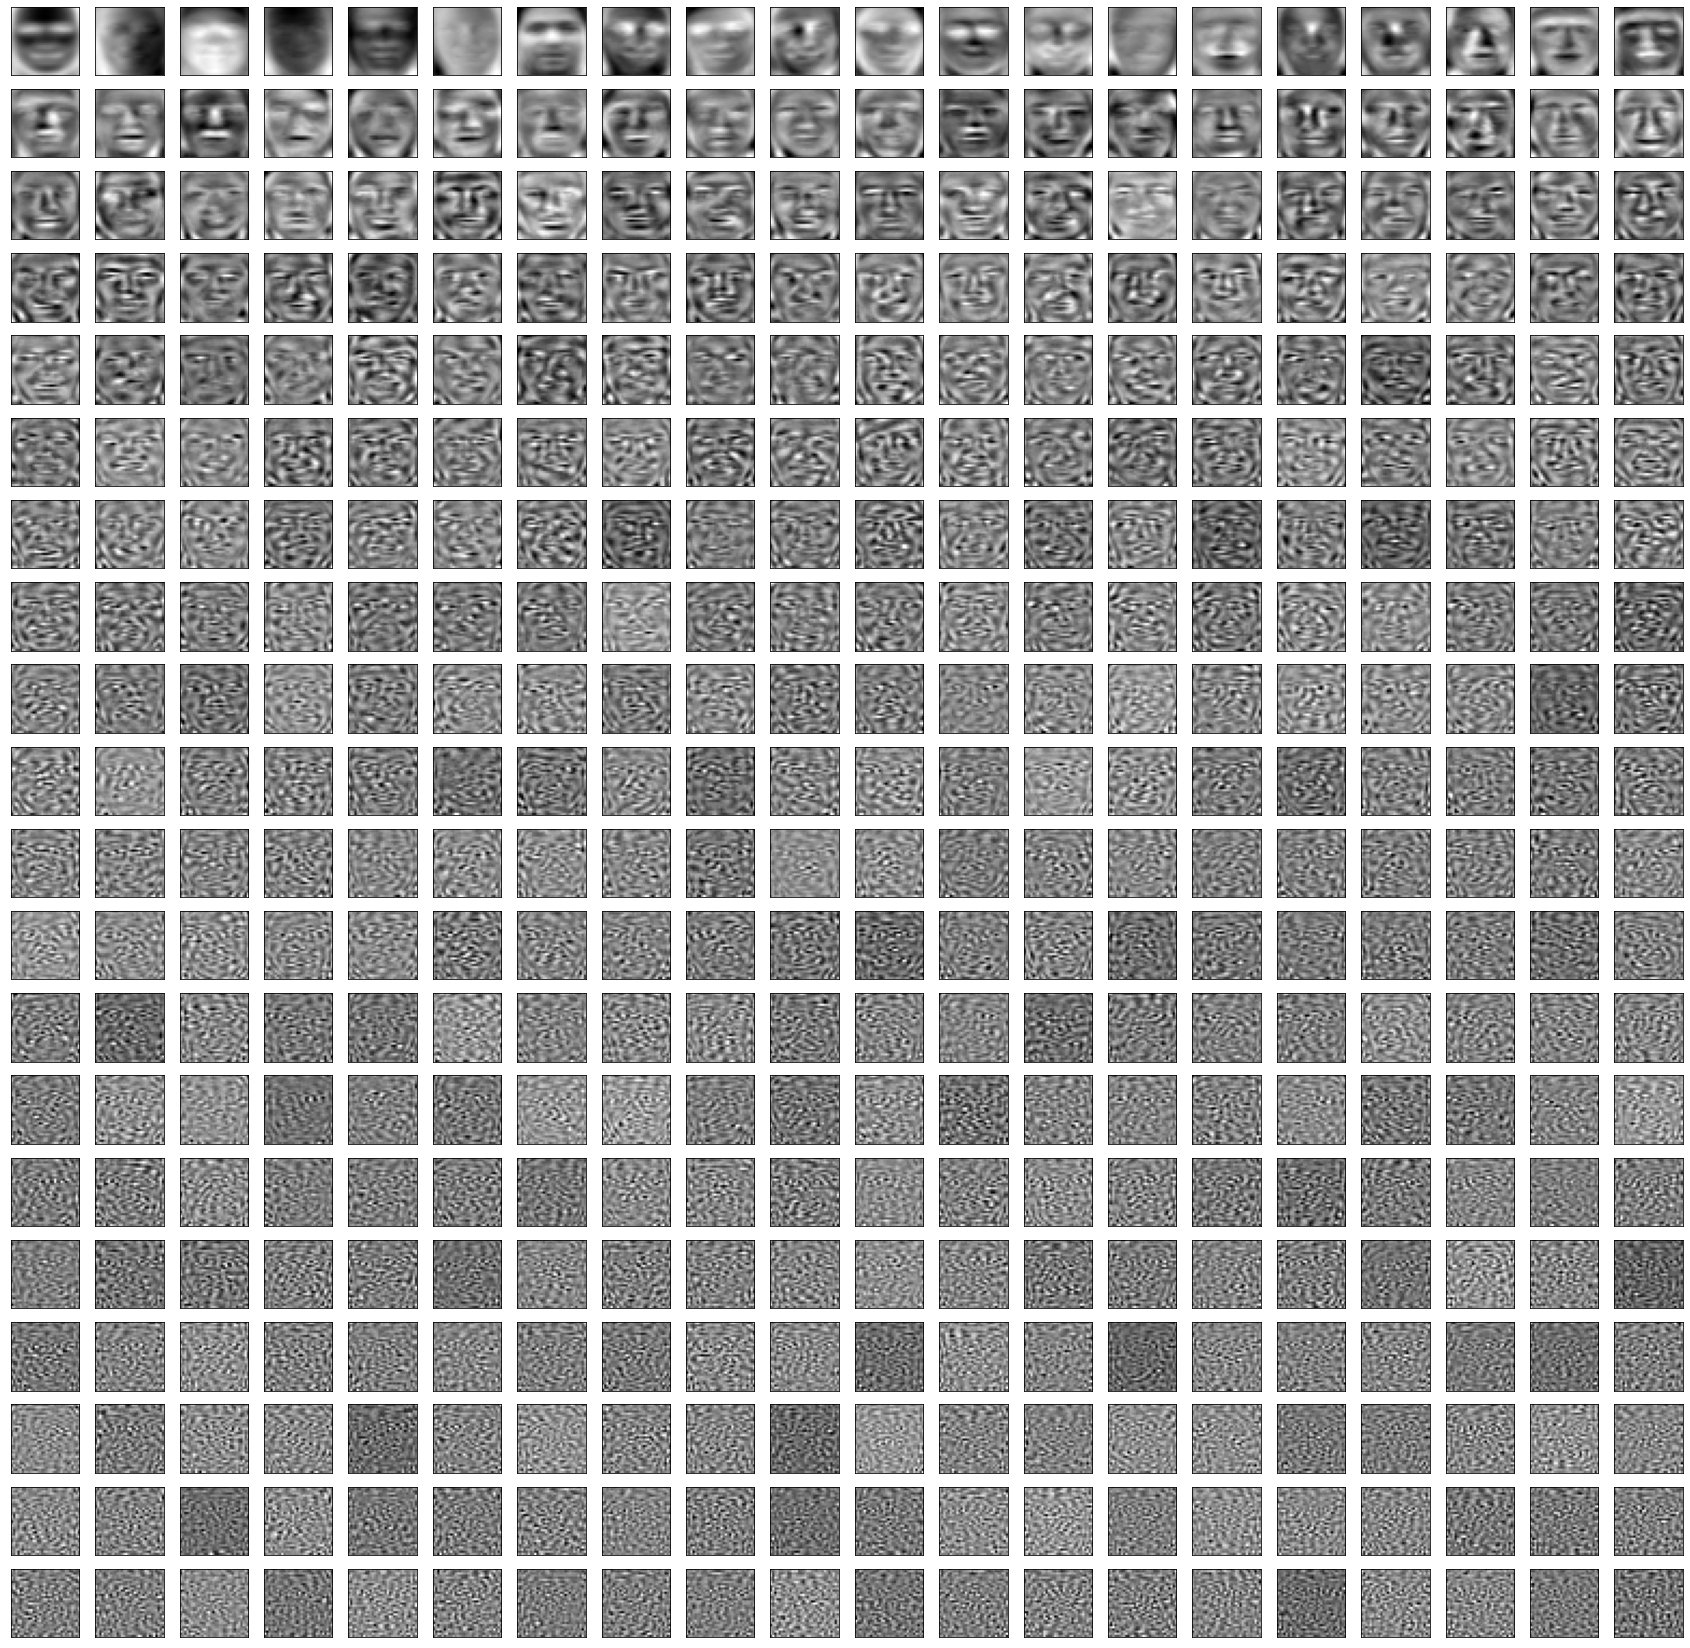

In [25]:
#뽑은거 출력해보기
image=eigenface
 
plt.figure(figsize=(30,30))
for i in range(400):
  plt.subplot(20,20,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image[i],cmap='gray')
plt.show()

### **Eigen Value/Eigen Vector**

In [ ]:
#Correlation Matrix(At*A)
flatT=np.transpose(flat)
multi=np.dot(flatT,flat)
print(np.shape(multi))

(1024, 1024)


In [ ]:
#Eigen value와 Eigen vector 뽑아내기
Evalue, Evector=np.linalg.eig(multi)

In [ ]:
#Eigen value 크기 순으로 인덱싱 번호 나열
Value2=[]
tmp=[]
tmpimg=np.zeros((1024,32,32))
for i in range(len(Evalue)):
  Value2.append(Evalue[i])
np.shape(Value2)
 
print(Value2)

[24737428955.28135, 283925535.8036971, 216533788.01731738, 182252661.98400584, 78649532.72711876, 77184116.0289551, 62767909.24771878, 51956768.96968607, 44235474.988939285, 42482128.85496051, 42067316.55377753, 36860075.05921962, 31367638.319480985, 30891150.526153207, 27703116.43654196, 23367403.059381526, 22931282.358017597, 20490045.264868252, 19366772.579026002, 18226783.919895347, 17534432.05811049, 16219652.479046926, 15168692.223779725, 14537898.10038523, 14346747.46063253, 13347680.29229191, 12665501.187059838, 11907404.4735526, 11269235.484122371, 10961241.025746021, 10406115.906368392, 9838605.79385725, 9797640.221243732, 9368126.902181322, 9084240.601996636, 8651154.6483156, 8204131.448556207, 8038672.250568781, 7880388.930281972, 7305303.897530602, 7181676.208041576, 7084335.171427715, 6962730.996443212, 6709920.032658537, 6684238.819439406, 6322027.491186796, 6092839.79762442, 5984974.205091494, 5912419.5331913605, 5690322.609271145, 5658681.893681431, 5480242.564578971, 

In [ ]:
#해당 인덱싱대로 Eigen vector를 뽑아서 리스트에 담기

In [ ]:
#400개 뽑고 400,32,32로 reshape
for i in range(len(Evector)):
  tmp.append(Evector[i])  
np.shape(tmp[0])
for i in range(len(Evector)):
  tmpimg[i]=tmp[i].reshape(32,32)

In [ ]:
#뽑은거 출력해보기
image=tmpimg
 
plt.figure(figsize=(30,30))
for i in range(400):
  plt.subplot(20,20,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image[i],cmap='gray')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### **Coefficient 구하기**

In [ ]:
#Flat한 eigen face만들기
flat_ef=[]
for i in range(len(eigenface)):
  flat_ef.append(eigenface[i].reshape(1024))

np.shape(flat_ef)

(1024, 1024)

In [ ]:
#리스트 합 구하기
def list_sum(a):
  sum=0
  for i in range(len(a)):
    sum=sum+a[i]
  return sum

In [ ]:
#계수 구하기
def CoEFF(a):
  coeff=[]
  a=a-avg
 
  for i in range(len(eigenface)):
    Ci=list_sum(a*flat_ef[i])
    coeff.append(Ci)
  return coeff

In [ ]:
def co_img(flatimg):
  sum=0
  C=CoEFF(flatimg)
  for i in range(len(C)):
    sum=sum+C[i]*eigenface[i]
  sum=sum+avgimg

  return sum

In [ ]:
remade=[]
for i in range(400):
  remade.append(co_img(flat[i]))

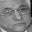

In [ ]:
cv2_imshow(remade[1])

In [ ]:
remade[0][3]-resized[0][3]

array([ 4.26325641e-14, -9.94759830e-14,  1.56319402e-13,  0.00000000e+00,
       -8.52651283e-14,  0.00000000e+00, -8.52651283e-14,  5.68434189e-14,
        5.68434189e-14,  8.52651283e-14, -2.84217094e-14, -2.84217094e-14,
       -2.84217094e-14, -8.52651283e-14, -5.68434189e-14, -5.68434189e-14,
       -2.84217094e-14,  0.00000000e+00, -2.84217094e-14, -2.84217094e-14,
       -8.52651283e-14, -1.13686838e-13, -1.13686838e-13, -8.52651283e-14,
       -8.52651283e-14, -2.84217094e-14,  5.68434189e-14,  5.68434189e-14,
        9.94759830e-14,  1.98951966e-13, -7.10542736e-15,  1.42108547e-14])

### **파일 불러오기**

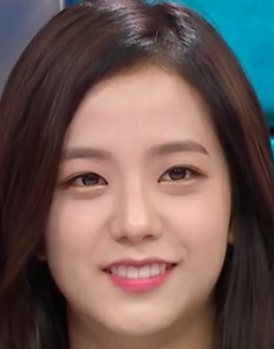

In [ ]:
Jisoo=cv2.imread('/content/drive/MyDrive/image/지수/1.png')
cv2_imshow(Jisoo)

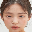

In [ ]:
Jenny=[]
for i in range(1,6):
  pic=cv2.imread('/content/drive/MyDrive/image/제니/'+str(i)+'.jpg')
  resized_pic=cv2.resize(pic,(32,32))
  Jenny.append(resized_pic)
cv2_imshow(Jenny[0])
